In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Load data
df = pd.read_csv("../data/data_with_anomalies.csv")
X = df.drop(['claim_status', 'anomaly_flag'], axis=1)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model on all data (for demo)
model = XGBClassifier(eval_metric='logloss')
model.fit(X_scaled, df['claim_status'])

# Predict and prioritize the frauds
df['fraud_score'] = model.predict_proba(X_scaled)[:, 1]
top_frauds = df[df['fraud_score'] > 0.8]

print(" Claims prioritized for investigation:")
print(top_frauds[['fraud_score']].head())
print(top_frauds[['customer_age', 'subscription_length', 'fraud_score']].head())



 Claims prioritized for investigation:
       fraud_score
6837      0.885422
15289     0.873179
51267     0.884162
       customer_age  subscription_length  fraud_score
6837             66                 11.7     0.885422
15289            44                 12.4     0.873179
51267            66                 12.4     0.884162


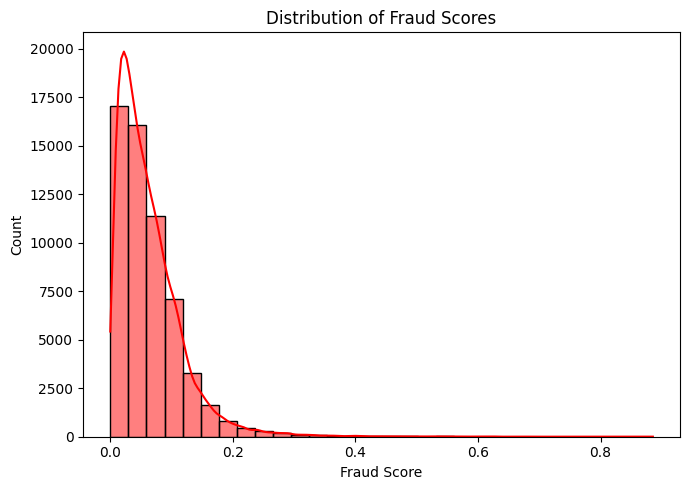

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
if 'fraud_score' in df.columns:
    plt.figure(figsize=(7, 5))
    sns.histplot(df['fraud_score'], bins=30, kde=True, color='red')
    plt.title("Distribution of Fraud Scores")
    plt.xlabel("Fraud Score")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()